# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [35]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]


### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [36]:
# ... ENTER YOUR CODE HERE
import numpy as np
def poly_fit(x,y,m):
    num_obs=len(x)
    x=np.array(x)
    X=np.zeros([num_obs,m+1])
    y=np.array(y).reshape([-1,1])
    for power in range(m+1):
        X[:,power]=x**power
    return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
for m in [1,2,3,4,5,6,7,8,9]:
    a=poly_fit(x,y,m)
    print("When fit with ",m,"th order polynomial, the coefficients are ",a)

When fit with  1 th order polynomial, the coefficients are  [[-0.6479869 ]
 [ 1.46502399]]
When fit with  2 th order polynomial, the coefficients are  [[-1.25772058]
 [-0.65313865]
 [ 1.0667959 ]]
When fit with  3 th order polynomial, the coefficients are  [[ 0.49483598]
 [-0.26983377]
 [-2.01973166]
 [ 1.01540301]]
When fit with  4 th order polynomial, the coefficients are  [[ 0.51184244]
 [-0.33857023]
 [-2.05689291]
 [ 1.08931365]
 [-0.01872316]]
When fit with  5 th order polynomial, the coefficients are  [[ 0.53158296]
 [-0.24431123]
 [-2.15174437]
 [ 0.99954653]
 [ 0.07265921]
 [-0.01835276]]
When fit with  6 th order polynomial, the coefficients are  [[ 0.58335489]
 [-0.21341539]
 [-2.47667914]
 [ 1.08743364]
 [ 0.3156542 ]
 [-0.17478186]
 [ 0.02574425]]
When fit with  7 th order polynomial, the coefficients are  [[ 0.5744677 ]
 [-0.13006497]
 [-2.3829579 ]
 [ 0.80842609]
 [ 0.3196533 ]
 [ 0.0116892 ]
 [-0.06899496]
 [ 0.01366621]]
When fit with  8 th order polynomial, the coeffi

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [37]:
# ... ENTER YOUR CODE HERE ...
def compute_error(x,y,m):
    coefficients=poly_fit(x,y,m)
    num_obs=len(x)
    x=np.array(x)
    X=np.zeros([num_obs,m+1])
    y=np.array(y).reshape([-1,1])
    for power in range(m+1):
        X[:,power]=x**power
    prediction=np.dot(X,coefficients)
    return 1/(num_obs-m)*np.sum((prediction-y)**2)
for m in [1,2,3,4,5,6,7,8,9]:
    e=compute_error(x,y,m)
    print("When fit with ",m,"th order polynomial, the prediction error is ",e)

When fit with  1 th order polynomial, the prediction error is  4.4502158667062055
When fit with  2 th order polynomial, the prediction error is  2.4534269975791783
When fit with  3 th order polynomial, the prediction error is  0.012470899099731626
When fit with  4 th order polynomial, the prediction error is  0.012460407583510065
When fit with  5 th order polynomial, the prediction error is  0.012600059280330624
When fit with  6 th order polynomial, the prediction error is  0.011590813700606687
When fit with  7 th order polynomial, the prediction error is  0.012289041756436612
When fit with  8 th order polynomial, the prediction error is  0.011569371524733585
When fit with  9 th order polynomial, the prediction error is  0.012931045182330226


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

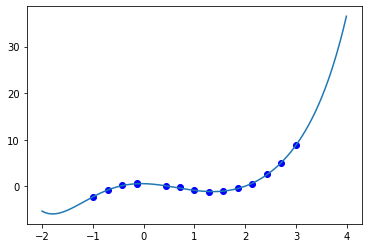

In [39]:
# ... ENTER YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'bo')
for m in [6]:
    coefficients=poly_fit(x,y,m)
    x_test=np.arange(-2,4,0.01)
    X_test=np.zeros([len(x_test),m+1])
    for power in range(m+1):
        X_test[:,power]=x_test**power
    y_test=np.dot(X_test,coefficients)
    plt.plot(x_test,y_test)
        

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [40]:
# ... ENTER YOUR CODE HERE ...
#The equation is y=Xb---> (X'X)b=X'y
def ls_qr(x,y,m):
    num_obs=len(x)
    x=np.array(x)
    X=np.zeros([num_obs,m+1])
    y=np.array(y).reshape([-1,1])
    for power in range(m+1):
        X[:,power]=x**power
    return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
b_new=ls_qr(x,y,6)
b_new

array([[ 0.58335489],
       [-0.21341539],
       [-2.47667914],
       [ 1.08743364],
       [ 0.3156542 ],
       [-0.17478186],
       [ 0.02574425]])

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

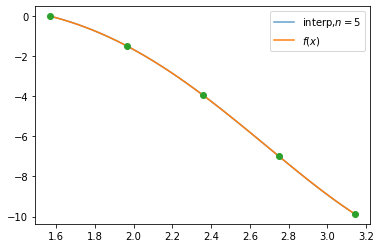

In [45]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import math
%matplotlib inline
def lagrange_k(xval,xk,k):
    n=len(xk)
    term=1.0
    for j in range(n):
        if j==k:
            continue
        num=xval-xk[j]
        den=xk[k]-xk[j]
        term*=num/den
    return term
def lagrange(xval,xk,yk):
    return sum(yk[j]*lagrange_k(xval,xk,j) for j in range(len(xk)))
def plot_interp(func,nodes,add_legend=True):
    yy=func(nodes)
    xn=np.linspace(math.pi/2,math.pi,100)
    yn=[lagrange(_,nodes,yy) for _ in xn]
    #plot
    plt.plot(xn,yn,'-',alpha=0.7,label=r'interp,$n=%s$' %len(nodes))
    plt.plot(xn,func(xn),label=r'$f(x)$')
    plt.plot(nodes,yy,'o')
    if add_legend:
        plt.legend(loc='best')
nodes=np.linspace(math.pi/2,math.pi,5)
plot_interp(lambda x:(x**2)*np.cos(x),nodes)

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

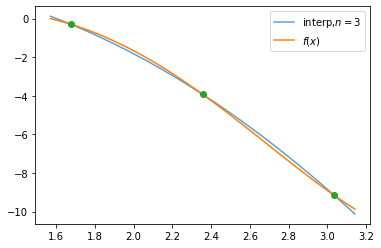

In [49]:
# ... ENTER YOUR CODE HERE 
#the interval is [a,b], need to adjust chebyshev nodes according to x=(a+b)/2+(b-a)/2*t
def cheb_nodes(n):
    k=np.arange(n)
    return (np.cos((2*k+1)*np.pi/(2*n)))*0.25*np.pi+0.75*np.pi
plot_interp(lambda x:(x**2)*np.cos(x),nodes=cheb_nodes(3))